In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [3]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species.shape

(5824, 4)

In [6]:
observations.shape

(23296, 3)

In [9]:
print(species.scientific_name.nunique())

5541


In [10]:
print(species.category.nunique())

7


In [11]:
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [13]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [14]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [16]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [21]:
species.fillna("No Intervention",inplace=True)

In [22]:
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [37]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

In [38]:
print(conservationCategory)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


In [33]:
cc = species.groupby("category")["scientific_name"].size()

In [34]:
print(cc)

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64


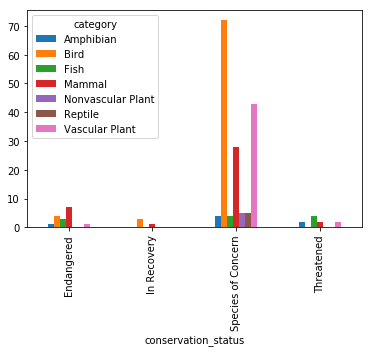

In [44]:
conservationCategory.plot(kind='bar')

In [45]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [47]:
print(species['is_protected'])

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8        True
9        True
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
5794    False
5795    False
5796    False
5797    False
5798    False
5799    False
5800    False
5801    False
5802    False
5803    False
5804    False
5805    False
5806    False
5807    False
5808    False
5809    False
5810    False
5811    False
5812    False
5813    False
5814    False
5815    False
5816    False
5817    False
5818    False
5819    False
5820    False
5821    False
5822    False
5823    False
Name: is_protected, Length: 5824, dtype: bool


In [58]:
ccounts = species.groupby(["category", "is_protected"])['scientific_name'].nunique().unstack()

In [59]:
print(ccounts)

is_protected       False  True 
category                       
Amphibian             72      7
Bird                 413     75
Fish                 115     11
Mammal               146     30
Nonvascular Plant    328      5
Reptile               73      5
Vascular Plant      4216     46


In [66]:
ccounts.columns = [ 'not_protected', 'protected']
ccounts

,not_protected,protected
category,,
Amphibian,72,7
Bird,413,75
Fish,115,11
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


In [63]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name').reset_index()

In [64]:
print(category_counts)

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    11
3                        Mammal    146    30
4             Nonvascular Plant    328     5
5                       Reptile     73     5
6                Vascular Plant   4216    46


In [67]:
ccounts['percent_protected'] = ccounts.protected / \
                                      (ccounts.protected + ccounts.not_protected) * 100

ccounts

,not_protected,protected,percent_protected
category,,,
Amphibian,72,7,8.860759
Bird,413,75,15.368852
Fish,115,11,8.730159
Mammal,146,30,17.045455
Nonvascular Plant,328,5,1.501502
Reptile,73,5,6.410256
Vascular Plant,4216,46,1.079305


In [68]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557, 0.6875948096661336, 1, array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

In [69]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)


(4.289183096203645, 0.03835559022969898, 1, array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

In [70]:
common = species.common_names
print(common)

0                                Gapper's Red-Backed Vole
1                                   American Bison, Bison
2       Aurochs, Aurochs, Domestic Cattle (Feral), Dom...
3       Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
4                                           Wapiti Or Elk
5                                       White-Tailed Deer
6                                     Feral Hog, Wild Pig
7                                                  Coyote
8                                               Gray Wolf
9                                                Red Wolf
10                              Common Gray Fox, Gray Fox
11              Black Fox, Cross Fox, Red Fox, Silver Fox
12                                                Red Fox
13                                          Mountain Lion
14                                      Wild Cat, Wildcat
15                                                 Bobcat
16                                Panther (Mountain Lion)
17            

In [73]:
from itertools import chain
import string
def remove_punctuation(text):
    for i in text:
        if i in string.punctuation:
            text = text.replace(i,'')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuation)\
    .str.split().tolist()


In [74]:
common_Names

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Fox', 'Red', 'Fox', 'Silver', 'Fox'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat', 'Red', 'Bat'],
 ['Hoary', 

In [75]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [79]:
cc = []
for i in cleanRows:
    for j in i:
        cc.append(j)
cc

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated',
 'Domestic',
 'Sheep',
 'Mouflon',
 'Red',
 'Feral',
 'Wapiti',
 'Or',
 'Elk',
 'WhiteTailed',
 'Deer',
 'Feral',
 'Hog',
 'Wild',
 'Pig',
 'Coyote',
 'Gray',
 'Wolf',
 'Red',
 'Wolf',
 'Common',
 'Gray',
 'Fox',
 'Black',
 'Fox',
 'Cross',
 'Red',
 'Silver',
 'Red',
 'Fox',
 'Mountain',
 'Lion',
 'Wild',
 'Cat',
 'Wildcat',
 'Bobcat',
 'Panther',
 'Mountain',
 'Lion',
 'Striped',
 'Skunk',
 'Eastern',
 'Spotted',
 'Skunk',
 'River',
 'Otter',
 'Northern',
 'River',
 'Otter',
 'Fisher',
 'Mink',
 'Or',
 'Weasel',
 'LongTailed',
 'Weasel',
 'Least',
 'Weasel',
 'Mink',
 'Common',
 'Raccoon',
 'Black',
 'Bear',
 'Rafinesques',
 'BigEared',
 'Bat',
 'Big',
 'Brown',
 'Bat',
 'SilverHaired',
 'Bat',
 'Eastern',
 'Red',
 'Bat',
 'Hoary',
 'Bat',
 'Mississippi',
 'Myotis',
 'Southeastern',
 'Gray',
 'Myotis',
 'Keens',
 'Myotis',
 'Eastern',
 'SmallFooted',
 'Bat',
 'Myoti

In [84]:
words_counted = []

for i in res:
    x = cc.count(i)
    words_counted.append((i,x))
words_counted = pd.DataFrame(words_counted)
words_counted.columns = ['Word','Count']
# pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

In [86]:
words_counted.sort_values("Count")

,Word,Count
0,Gappers,1
350,Muskbeaver,1
436,Ringtail,1
185,Carolina,1
346,BushyTailed,1
343,Richardson,1
89,Keens,1
442,Mastiff,1
192,Woodchuck,1
444,Mexican,1


In [87]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [88]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True
